Load California housing dataset from sklearn
sklearn.datasets.fetch_california_housing
a. Display the features and show the count of categorical and numerical features.
b. Plot line plot graph between price of house and No of bedrooms
c. Figure out the number of missing values in each field. If there is any missing value, try
substituting it using appropriate way.
d. Using Linear regression model and SVM model to predict the house price using 60% training
and 40% test data.
e. For both above models, show the comparison in performance matrices of Accuracy, precision,
recall and F1 score.

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = fetch_california_housing()
print(data)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

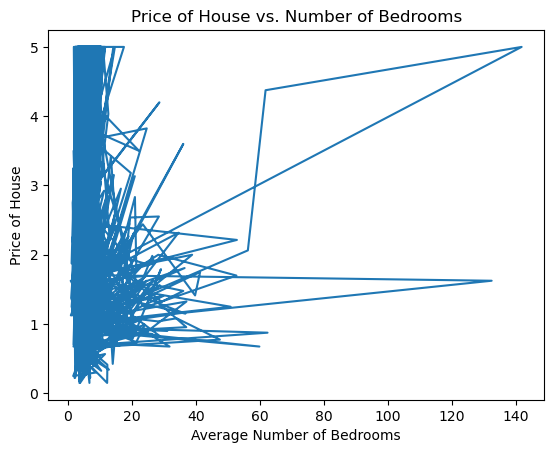

In [12]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Price']=data.target

numerical_features=df.select_dtypes(include=[np.number]).shape[1]
categorical_features=df.select_dtypes(exclude=[np.number]).shape[1]
plt.plot(df['AveRooms'],df['Price'])
plt.xlabel("Average Number of Bedrooms")
plt.ylabel("Price of House")
plt.title("Price of House vs. Number of Bedrooms")
plt.show()

In [42]:
missing_values=df.isnull(),sum
df.fillna(df.mean(),inplace=True)
# print(missing_values)

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  Price  
0          F

In [25]:
X=df.drop('Price', axis=1)
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
y_linear=linear_model.predict(X_test)
# print(y_linear)
svm_model=SVR()
svm_model.fit(X_train,y_train)
y_svm=svm_model.predict(X_test)
# print(y_svm)

[1.77364241 1.83958033 1.79015952 ... 1.84233438 1.76752354 1.77047635]


In [29]:
y_linear_binary=np.where(y_linear>1.0,1,0)
y_test_binary=np.where(y_test>1.0,1,0)
y_svm_binary=np.where(y_svm>1.0,1,0)

In [32]:
print(y_linear_binary)
print(y_test_binary)
print(y_svm_binary)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [34]:
accuracy_linear=accuracy_score(y_test_binary,y_linear_binary)
precision_linear=precision_score(y_test_binary,y_linear_binary)
recall_linear=recall_score(y_test_binary,y_linear_binary)
f1_linear=f1_score(y_test_binary,y_linear_binary)

accuracy_svm=accuracy_score(y_test_binary,y_svm_binary)
precision_svm=precision_score(y_test_binary,y_svm_binary)
recall_svm=recall_score(y_test_binary,y_svm_binary)
f1_svm=f1_score(y_test_binary,y_svm_binary)


In [38]:
print(accuracy_linear)
print(precision_linear)
print(recall_linear)
print(f1_linear)

0.8630087209302325
0.8803821313240043
0.9643330876934414
0.9204473517619751


In [39]:
print(accuracy_svm)
print(precision_svm)
print(recall_svm)
print(f1_svm)

0.8218265503875969
0.8218265503875969
1.0
0.9022006515524233
